In [1]:
##check for gpu
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-9c073e22-5d81-05e1-a1cd-2dfb41c586fe)


##Get helper Functions



In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

#import serires of funtions 
from helper_functions import unzip_data,create_tensorboard_callback,plot_loss_curves,compare_historys

--2021-08-13 02:20:38--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-08-13 02:20:38 (97.5 MB/s) - ‘helper_functions.py’ saved [10246/10246]



##Get a text dataset

link :https://www.kaggle.com/c/nlp-getting-started


In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

#unzip data
unzip_data("nlp_getting_started.zip")

--2021-08-13 02:20:40--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.004s  

2021-08-13 02:20:40 (140 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



##Visulaizing the dataset

In [4]:
import pandas as pd
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
#shuffle training dataframe
train_df_shuffled =train_df.sample(frac=1,random_state=42)
train_df_shuffled.head()


,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [6]:
#test dataframe look
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [7]:
#count the examples
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [8]:
len(test_df),len(train_df)

(3263, 7613)

In [9]:
#visulalize random samples
import random
random_index=random.randint(0,len(train_df)-5)
for row in train_df_shuffled[["text","target"]][random_index:random_index+5].itertuples():
   _,text,target=row
   print(f"Target :{target}","(real disater)" if target > 0 else "(not real disater)")
   print(f"Text :\n {text}\n")
   print("---\n")

Target :1 (real disater)
Text :
 Killing Black Babies at Planned Parenthood where's the demonstrations looting of PP burning down the buildings Black Babies Lives Matter

---

Target :1 (real disater)
Text :
 Expect gusty winds heavy downpours and lightning moving northeast toward VA now. http://t.co/jyxafD4knK

---

Target :1 (real disater)
Text :
 Severe hailstorm in progress over Northeast Logan County... #cowx http://t.co/XK9OwGV1O5

---

Target :1 (real disater)
Text :
 @HeyImBeeYT its like theres fire in my skin and im drowning from within ????

---

Target :1 (real disater)
Text :
 a siren just went off and it wasn't the Forney tornado warning ??

---



##Split data into train and Validation

In [10]:
from sklearn.model_selection import train_test_split


In [11]:
#use train test split 
train_sentences,val_sentences,train_labels,val_labels=train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                       train_df_shuffled["target"].to_numpy(),
                                                                       test_size=0.1,
                                                                       random_state=42)

In [12]:
#check the length
len(train_sentences),len(val_sentences),len(train_labels),len(val_labels)

(6851, 762, 6851, 762)

In [13]:
train_sentences[:10],train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

##Converting Text into numbers

when dealing with text problem ,

1. builld the model to convert the words into numbers
  
  *Tokanization
  
  *embedding



##Tokenization

In [14]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization


In [15]:
#use the defult text vectorization parameters
text_vectorizer =TextVectorization(max_tokens=None,#how many words taken into token
                                   standardize="lower_and_strip_punctuation",
                                   split="whitespace",
                                   ngrams=None,
                                   output_mode="int",
                                   output_sequence_length=None,
                                   pad_to_max_tokens=True)

In [16]:
text_vectorizer

In [17]:
#find the avarge number of tokens
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [18]:
#setup the text vectorization varibales
max_vocab_length=10000 #max number in vocabulary
max_length=15 #max length our sequences 

text_vectorizer =TextVectorization(max_tokens=max_vocab_length,
                                   output_mode="int",
                                   output_sequence_length=max_length)



In [19]:
#fit the text vectorizer to train data
text_vectorizer.adapt(train_sentences)

In [20]:
#create a sample sentence and tokenize it
sample_sentence ="there is fire in my town"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 74,   9,  42,   4,  13, 801,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [21]:
#choose random sentence from the training daatset
random_sentence=random.choice(train_sentences)
print(f"Orignal text :\n {random_sentence} \
      \n\nVectorized version:")

text_vectorizer([random_sentence])

Orignal text :
 A Tale of Two Pox - Body Horrors http://t.co/W2IXT1k0AB #virus #infectiousdiseases #bioterrorism       

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[   3, 4474,    6,  116, 9645,   83, 3774,    1, 3272,    1,  789,
           0,    0,    0,    0]])>

In [22]:
#get the unique words in the vocabulary
words_in_vocab=text_vectorizer.get_vocabulary() #get all the unique words in train data
top_5_words=words_in_vocab[:5]
bottom_5_words=words_in_vocab[:-5]

print(f"Number of words in vocab :{len(words_in_vocab)}")
print(f"5 most common words in vocab :{top_5_words}")
print(f"5 least common of words in vocab :{bottom_5_words}")

Number of words in vocab :10000
5 most common words in vocab :['', '[UNK]', 'the', 'a', 'in']
5 least common of words in vocab :['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is', 'for', 'on', 'you', 'my', 'with', 'it', 'that', 'at', 'by', 'this', 'from', 'be', 'are', 'was', 'have', 'like', 'as', 'up', 'so', 'just', 'but', 'me', 'im', 'your', 'not', 'amp', 'out', 'its', 'will', 'an', 'no', 'has', 'fire', 'after', 'all', 'when', 'we', 'if', 'now', 'via', 'new', 'more', 'get', 'or', 'about', 'what', 'he', 'people', 'news', 'been', 'over', 'one', 'how', 'dont', 'they', 'who', 'into', 'were', 'do', 'us', '2', 'can', 'video', 'emergency', 'there', 'disaster', 'than', 'police', 'would', 'his', 'still', 'her', 'some', 'body', 'storm', 'crash', 'burning', 'suicide', 'back', 'man', 'california', 'why', 'time', 'them', 'had', 'buildings', 'rt', 'first', 'cant', 'see', 'got', 'day', 'off', 'our', 'going', 'nuclear', 'know', 'world', 'bomb', 'fires', 'love', 'killed', 'go', 'attack', 'yo

##Create a Embedding using Embedding Layer

PARAMETERS:

1.INPUT DIM-size of the vocabulary

2.OUTPUT DIM -size of the output embedding vector

3.INPUT LENGTH-length of the sequence being passed to the embedding layer

In [23]:
from tensorflow.keras import layers
embedding=layers.Embedding(input_dim=max_vocab_length,
                           output_dim=128,
                           input_length=max_length)

embedding

In [24]:
random_sentence=random.choice(train_sentences)
print(f"Orignal Text :\n{random_sentence}\
      \n\nEmbedded Vesrion :")

#embed the setence
sample_embed =embedding(text_vectorizer([random_sentence]))
sample_embed

Orignal Text :
Traffic Collision - Ambulance Enroute: Elkhorn Blvd at Walerga Rd Sacramento http://t.co/5qHQo6eJtu      

Embedded Vesrion :


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.04147976, -0.02172961,  0.00343223, ..., -0.03263773,
         -0.0210107 , -0.0381295 ],
        [-0.02073265, -0.04258734, -0.03416393, ..., -0.03112056,
         -0.00820446, -0.02495926],
        [ 0.04041258, -0.02996072,  0.02110134, ...,  0.03504335,
          0.01937691,  0.01915932],
        ...,
        [ 0.04227427, -0.03752406,  0.02561975, ..., -0.03625711,
         -0.00598043,  0.04467628],
        [ 0.04227427, -0.03752406,  0.02561975, ..., -0.03625711,
         -0.00598043,  0.04467628],
        [ 0.04227427, -0.03752406,  0.02561975, ..., -0.03625711,
         -0.00598043,  0.04467628]]], dtype=float32)>

In [25]:
#check out single token embedding
sample_embed[0][0],sample_embed[0][0].shape,random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-4.14797552e-02, -2.17296127e-02,  3.43222544e-03, -4.90975045e-02,
         4.30714227e-02,  9.13644955e-03, -1.07347257e-02, -2.39859466e-02,
        -3.04172039e-02, -4.71954830e-02,  3.65434177e-02, -4.08458710e-03,
        -2.64066104e-02,  4.63296808e-02,  2.23573186e-02, -2.00941805e-02,
         3.32094915e-02,  4.96721603e-02,  3.62815149e-02, -1.42566450e-02,
         2.87447460e-02,  1.34695508e-02,  4.35838141e-02,  2.77112983e-02,
        -2.61028539e-02,  1.64493434e-02,  7.05590099e-03,  1.29654892e-02,
         1.56737603e-02,  1.37350820e-02,  1.93127431e-02, -3.83217819e-02,
        -2.31423508e-02,  4.77086045e-02,  1.69551261e-02, -3.04681659e-02,
         1.42865665e-02,  2.06250437e-02,  1.29865147e-02,  3.21592018e-03,
         3.64493988e-02,  1.70576014e-02,  3.66536491e-02, -4.98105176e-02,
         3.68118323e-02, -3.11548114e-02, -1.73164979e-02, -4.58794832e-02,
         4.98825945e-02,  3.45137827e-0

##Modeling a Text Dataset and Runnning Experiments

model 0-naive bayes(baseline)

model 1-Feed forward neaural Network(dense model)

model 2-LSTM Model

model 3-GRU Model

model 4-Bidirectional Model

model 5-ID Convolutional Neural Network Model

model 6-Tensorflow hub pre trained feature extractor Model

model 7-same model with 10% training data Model

*steps:

+create the model

+compile the model

+fit the model

+evaluate the model


##Model 0 -Getting a Baseline model

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

#create tokanization and modeling pipeline
model_0=Pipeline([
                  ("tfidf",TfidfVectorizer()),
                  ("clf",MultinomialNB())
])

#fit the pipeline to the training data
model_0.fit(train_sentences,train_labels)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [27]:
#evaluate the baseline model
baseline_score=model_0.score(val_sentences,val_labels)
print(f"model arcive score :{baseline_score*100:.2f}")
baseline_score

model arcive score :79.27


0.7926509186351706

In [28]:
#make predictions
baseline_preds=model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

##Create evaluation Function

Accuracy

precition

recall

f1-score


In [29]:
#funtion to evaluate
from sklearn.metrics import accuracy_score,precision_recall_fscore_support

def calcualte_results(y_true,y_preds):
  """
  Calculates model accuracy,preciton,recall and f1 score of a binary classification model
  """

  #calcualte model accuracy
  model_accuracy=accuracy_score(y_true,y_preds)*100

  #calculate model prestion,recall,f1-score 
  model_precision,model_recall,model_f1,_ =precision_recall_fscore_support(y_true,y_preds,average="weighted")
  model_results={"accuracy":model_accuracy,
                 "precision":model_precision,
                 "recall":model_recall,
                 "f1":model_f1}

  return model_results



In [30]:
#get baseline results
baseline_results =calcualte_results(y_true=val_labels,
                                    y_preds=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

##Model 1 -Build a Dense Model

In [31]:
#crate a tensorboard callbacks
from helper_functions import create_tensorboard_callback

#create directory to save logs
SAVE_DIR="model_logs"

In [32]:
#build model with functional API
from tensorflow.keras import layers

inputs =layers.Input(shape=(1,),dtype =tf.string)

#turn text into numbers
x=text_vectorizer(inputs)

#create an embedding of the numberized inputs
x=embedding(x)

x=layers.GlobalAveragePooling1D()(x)

outputs=layers.Dense(1,activation="sigmoid")(x)

model_1=tf.keras.Model(inputs,outputs,name="model_1")

In [33]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [34]:
#compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [35]:
#fit the model
model_1_history=model_1.fit(x=train_sentences,
                            y=train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                   experiment_name="model_1_dense")])


Saving TensorBoard log files to: model_logs/model_1_dense/20210813-022049
Epoch 1/5
215/215 [==============================] - 7s 18ms/step - loss: 0.6105 - accuracy: 0.6885 - val_loss: 0.5362 - val_accuracy: 0.7598
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.4414 - accuracy: 0.8175 - val_loss: 0.4762 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3476 - accuracy: 0.8589 - val_loss: 0.4575 - val_accuracy: 0.7913
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.2844 - accuracy: 0.8921 - val_loss: 0.4619 - val_accuracy: 0.7900
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.2379 - accuracy: 0.9102 - val_loss: 0.4768 - val_accuracy: 0.7782


In [36]:
#check the results
model_1.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4768 - accuracy: 0.7782


[0.4767746031284332, 0.778215229511261]

In [37]:
#make predictions
model_1_pred_probs=model_1.predict(val_sentences)
model_1_pred_probs

array([[4.16506737e-01],
       [8.27532947e-01],
       [9.97954845e-01],
       [1.22909665e-01],
       [1.08503290e-01],
       [9.44703281e-01],
       [9.12174225e-01],
       [9.92841482e-01],
       [9.72873211e-01],
       [2.69740790e-01],
       [1.32156715e-01],
       [7.30028450e-01],
       [7.12235644e-02],
       [2.25962177e-01],
       [4.90360195e-03],
       [1.54764593e-01],
       [2.93908678e-02],
       [1.02209397e-01],
       [2.44502127e-01],
       [5.92454135e-01],
       [9.25272048e-01],
       [5.23637682e-02],
       [4.79276389e-01],
       [9.52294320e-02],
       [9.60477948e-01],
       [9.99068677e-01],
       [3.33185904e-02],
       [7.27377981e-02],
       [3.06407213e-02],
       [2.17229113e-01],
       [5.74147761e-01],
       [2.59698987e-01],
       [5.26939273e-01],
       [1.77836299e-01],
       [5.29604018e-01],
       [5.73164746e-02],
       [9.94115591e-01],
       [1.51668385e-01],
       [3.71332467e-02],
       [9.98392284e-01],


In [38]:
#convert predicions to label format
model_1_preds=tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [39]:
#calculte model_1_results
model_1_results=calcualte_results(y_true=val_labels,
                                  y_preds=model_1_preds)

model_1_results

{'accuracy': 77.82152230971128,
 'f1': 0.7757459581978545,
 'precision': 0.7810722984564322,
 'recall': 0.7782152230971129}

In [40]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

##Visializing Laerned Embeddings

In [41]:
#get the vocabulary from the text vectorization
words_in_vocab=text_vectorizer.get_vocabulary()
len(words_in_vocab),words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [42]:
#Model 1 summary
model_1.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [43]:
#get the weight metrics of embedding layer
embed_weights =model_1.get_layer("embedding").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [44]:
embed_weights

array([[ 0.02840462, -0.05965249,  0.00608478, ..., -0.01793884,
        -0.02559672,  0.02685549],
       [-0.01696193, -0.02757467, -0.03745956, ...,  0.03498342,
         0.01258862, -0.00219661],
       [ 0.03346804, -0.02462018, -0.029239  , ...,  0.02278417,
        -0.0231367 , -0.02445792],
       ...,
       [ 0.01758829,  0.04425342,  0.04240182, ...,  0.01729682,
        -0.00215503, -0.02656492],
       [ 0.00218442, -0.06987019, -0.02269548, ...,  0.05652967,
         0.00066484, -0.00199814],
       [-0.06445564, -0.09475164, -0.02206937, ...,  0.0810428 ,
        -0.03557089, -0.02780933]], dtype=float32)

In [45]:
#create embedding files
import io

out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [46]:
#downlaod files from colab to projector
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Model 2-Recurrent Neural Network

Structure of the RNN:

Input-->Tokenize-->Embedding-->Layers-->Output

In [47]:
#cerate an lstm model
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype="string")
x=text_vectorizer(inputs)
x=embedding(x)
print(x.shape)

# x=layers.LSTM(units=64,return_sequences=True)(x)
# print(x.shape)

x=layers.LSTM(64)(x)
print(x.shape)

# x=layers.Dense(64,activation="relu")(x)
# print(x.shape)

outputs=layers.Dense(1,activation="sigmoid")(x)
model_2=tf.keras.Model(inputs,outputs,name="model_2_LSTM")


(None, 15, 128)
(None, 64)


In [48]:
#get the summary
model_2.summary()


Model: "model_2_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                49408     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
_________________________________________________________________


In [49]:
#compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [50]:
#fit the model
model_2_history =model_2.fit(train_sentences,
                             train_labels,
                             epochs=5,
                             validation_data=(val_sentences,val_labels),
                             callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                    "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20210813-022112
Epoch 1/5
215/215 [==============================] - 10s 21ms/step - loss: 0.2274 - accuracy: 0.9204 - val_loss: 0.5326 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 3s 16ms/step - loss: 0.1541 - accuracy: 0.9442 - val_loss: 0.7206 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.1285 - accuracy: 0.9523 - val_loss: 0.6869 - val_accuracy: 0.7835
Epoch 4/5
215/215 [==============================] - 3s 16ms/step - loss: 0.1059 - accuracy: 0.9591 - val_loss: 0.7452 - val_accuracy: 0.7769
Epoch 5/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0894 - accuracy: 0.9651 - val_loss: 0.9254 - val_accuracy: 0.7717


In [51]:
#make predictions 
model_2_pred_probs=model_2.predict(val_sentences)
model_2_pred_probs[:10]

array([[2.4520677e-02],
       [7.7500713e-01],
       [9.9982709e-01],
       [6.4785525e-02],
       [5.8460620e-04],
       [9.9916744e-01],
       [6.2958515e-01],
       [9.9987400e-01],
       [9.9978429e-01],
       [3.6333841e-01]], dtype=float32)

In [52]:
#convert model 2 pred to labels
model_2_preds=tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [53]:
#calculate the model results
model_2_results=calcualte_results(y_true=val_labels,
                                  y_preds=model_2_preds)

model_2_results

{'accuracy': 77.16535433070865,
 'f1': 0.7694523344399302,
 'precision': 0.773559668677779,
 'recall': 0.7716535433070866}

##Model 3 -GRU -Gated Recurrent Unit



In [54]:
#build rnn using the gru unit
from tensorflow.keras import layers
inputs =layers.Input(shape=(1,),dtype=tf.string)
x=text_vectorizer(inputs)
x=embedding(x)

#when stack recurrent layers ,return_sequences must be "True"
x=layers.GRU(64)(x)
# x=layers.LSTM(64,return_sequences=True)(x)
# x=layers.GRU(64,return_sequences=True)(x)
# x=layers.Dense(64,activation="relu")(x)
# x=layers.GlobalAveragePooling1D()(x)
outputs =layers.Dense(1,activation="sigmoid")(x)
model_3=tf.keras.Model(inputs,outputs,name="model_3_GRU")



In [55]:
#Model Summary
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
gru (GRU)                    (None, 64)                37248     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_________________________________________________________________


In [56]:
model_3.summary()


Model: "model_3_GRU"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
gru (GRU)                    (None, 64)                37248     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_________________________________________________________________


In [57]:

#compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [58]:
#fit the model
model_3_history =model_3.fit(train_sentences,
                             train_labels,
                             epochs=5,
                             validation_data=(val_sentences,val_labels),
                             callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                    "GRU")])

Saving TensorBoard log files to: model_logs/GRU/20210813-022136
Epoch 1/5
215/215 [==============================] - 6s 21ms/step - loss: 0.1569 - accuracy: 0.9396 - val_loss: 0.7895 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 4s 16ms/step - loss: 0.0819 - accuracy: 0.9686 - val_loss: 0.7874 - val_accuracy: 0.7769
Epoch 3/5
215/215 [==============================] - 3s 16ms/step - loss: 0.0702 - accuracy: 0.9729 - val_loss: 0.9347 - val_accuracy: 0.7730
Epoch 4/5
215/215 [==============================] - 4s 16ms/step - loss: 0.0629 - accuracy: 0.9745 - val_loss: 1.0408 - val_accuracy: 0.7730
Epoch 5/5
215/215 [==============================] - 4s 16ms/step - loss: 0.0526 - accuracy: 0.9764 - val_loss: 1.1875 - val_accuracy: 0.7822


In [59]:
#make predictions 
model_3_pred_probs=model_3.predict(val_sentences)
model_3_pred_probs[:10]

array([[3.5450055e-04],
       [5.9859550e-01],
       [9.9991465e-01],
       [6.7604691e-02],
       [1.2595706e-04],
       [9.9984205e-01],
       [7.4807853e-01],
       [9.9997425e-01],
       [9.9993837e-01],
       [9.3512815e-01]], dtype=float32)

In [60]:
#convert model 2 pred to labels
model_3_preds=tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [61]:
#calculate the model results
model_3_results=calcualte_results(y_true=val_labels,
                                y_preds=model_3_preds)
model_3_results


{'accuracy': 78.21522309711287,
 'f1': 0.7797935460636591,
 'precision': 0.7849731976577976,
 'recall': 0.7821522309711286}

In [62]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

##Model 4 -Bi directional RNN

In [63]:
#build the bidirectinal layer
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype="string")
x=text_vectorizer(inputs)
x=embedding(x)
print(x.shape)

# x=layers.Bidirectional(layers.LSTM(32,return_sequences=True))(x)
# print(x.shape)

x=layers.Bidirectional(layers.LSTM(64))(x)
print(x.shape)

outputs=layers.Dense(1,activation="sigmoid")(x)
model_4=tf.keras.Model(inputs,outputs,name="model_4_bidirectional")

(None, 15, 128)
(None, 128)


In [64]:
#model summary
model_4.summary()


Model: "model_4_bidirectional"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               98816     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 1,378,945
Trainable params: 1,378,945
Non-trainable params: 0
_________________________________________________________________


In [65]:
#compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [66]:
#fit the model
model_4_history =model_4.fit(train_sentences,
                             train_labels,
                             epochs=5,
                             validation_data=(val_sentences,val_labels),
                             callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                    "Bidirectional")])

Saving TensorBoard log files to: model_logs/Bidirectional/20210813-022158
Epoch 1/5
215/215 [==============================] - 8s 25ms/step - loss: 0.1096 - accuracy: 0.9682 - val_loss: 0.9567 - val_accuracy: 0.7756
Epoch 2/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0522 - accuracy: 0.9774 - val_loss: 1.1666 - val_accuracy: 0.7743
Epoch 3/5
215/215 [==============================] - 4s 19ms/step - loss: 0.0461 - accuracy: 0.9797 - val_loss: 1.5348 - val_accuracy: 0.7730
Epoch 4/5
215/215 [==============================] - 4s 19ms/step - loss: 0.0427 - accuracy: 0.9799 - val_loss: 1.3433 - val_accuracy: 0.7756
Epoch 5/5
215/215 [==============================] - 4s 19ms/step - loss: 0.0412 - accuracy: 0.9796 - val_loss: 1.3687 - val_accuracy: 0.7598


In [67]:
#make predictions 
model_4_pred_probs=model_4.predict(val_sentences)
model_4_pred_probs[:10]

array([[6.7966923e-02],
       [7.6949501e-01],
       [9.9997938e-01],
       [1.8692279e-01],
       [3.4385423e-05],
       [9.9909699e-01],
       [1.8462922e-01],
       [9.9999309e-01],
       [9.9998093e-01],
       [9.9605441e-01]], dtype=float32)

In [68]:
#convert model 2 pred to labels
model_4_preds=tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 0., 1., 1., 1.], dtype=float32)>

In [69]:
#calculate the model results
model_4_results=calcualte_results(y_true=val_labels,
                                y_preds=model_4_preds)
model_4_results


{'accuracy': 75.98425196850394,
 'f1': 0.7590768821741806,
 'precision': 0.7594780880165999,
 'recall': 0.7598425196850394}

In [70]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

In [71]:
model_3_results

{'accuracy': 78.21522309711287,
 'f1': 0.7797935460636591,
 'precision': 0.7849731976577976,
 'recall': 0.7821522309711286}

##Model 5-Convolutional Neural Networks for Text(Other types of sequence data)

In [72]:
#test out embedding ,conv1D and max pooling
from tensorflow.keras import layers
embedding_test=embedding(text_vectorizer(["this is a sentence"]))
conv_1d =layers.Conv1D(filters=32,
                       kernel_size=5,
                       activation="relu",
                       padding="valid")

conv_1d_output=conv_1d(embedding_test)

max_pool=layers.GlobalMaxPool1D()
max_pool_output=max_pool(conv_1d_output)


embedding_test.shape,conv_1d_output.shape,max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [73]:
conv_1d_output

<tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
array([[[4.42513078e-02, 3.01771536e-02, 2.90192999e-02, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.40878111e-02,
         6.28665462e-02, 3.79693955e-02, 0.00000000e+00, 0.00000000e+00,
         7.31884986e-02, 7.68600628e-02, 0.00000000e+00, 1.06715495e-04,
         1.26201183e-01, 5.19396961e-02, 0.00000000e+00, 5.74703924e-02,
         0.00000000e+00, 3.54083031e-02, 0.00000000e+00, 6.01640195e-02,
         2.74542607e-02, 0.00000000e+00, 1.11015765e-02, 7.71798333e-03,
         4.70469380e-03, 0.00000000e+00, 0.00000000e+00, 1.92740820e-02],
        [3.24435122e-02, 3.84333357e-02, 2.06849016e-02, 0.00000000e+00,
         2.24920805e-04, 4.51068319e-02, 3.85832191e-02, 4.28775400e-02,
         1.00014508e-01, 0.00000000e+00, 2.62888521e-02, 0.00000000e+00,
         0.00000000e+00, 1.30684453e-03, 0.00000000e+00, 0.00000000e+00,
         6.65103719e-02, 1.15336962e-02, 0.00000000e+00, 1.56307220e-0

In [74]:
#create 1 dimentional convolutional layer to model sequemces
from tensorflow.keras import layers
inputs =layers.Input(shape=(1,),dtype ="string")
x=text_vectorizer(inputs)
x=embedding(x)
x =layers.Conv1D(filters=64,kernel_size=5,activation="relu",padding="valid",strides=1 )(x)
x=layers.GlobalMaxPool1D()(x)
outputs =layers.Dense(1,activation="sigmoid")(x)
model_5 =tf.keras.Model(inputs,outputs,name="model_5_Conv1D")

#complete conv1D
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#model summary
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 11, 64)            41024     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 1,321,089
Trainable params: 1,321,089
Non-trainable params: 0
__________________________________________

In [75]:
#fit the model
model_5_history=model_5.fit(train_sentences,
                            train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks =[create_tensorboard_callback(SAVE_DIR,
                                                                    "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20210813-022247
Epoch 1/5
215/215 [==============================] - 6s 19ms/step - loss: 0.1252 - accuracy: 0.9602 - val_loss: 0.8875 - val_accuracy: 0.7638
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0752 - accuracy: 0.9711 - val_loss: 1.0048 - val_accuracy: 0.7625
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0592 - accuracy: 0.9764 - val_loss: 1.2024 - val_accuracy: 0.7638
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0573 - accuracy: 0.9769 - val_loss: 1.1564 - val_accuracy: 0.7559
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0499 - accuracy: 0.9774 - val_loss: 1.2372 - val_accuracy: 0.7493


In [76]:
#make predictions
model_5_pred_probs=model_5.predict(val_sentences)
model_5_pred_probs[:10]

array([[1.9182584e-01],
       [6.7708379e-01],
       [9.9989843e-01],
       [3.9052702e-02],
       [5.7839163e-08],
       [9.9254853e-01],
       [8.5426944e-01],
       [9.9990129e-01],
       [9.9999940e-01],
       [9.2454088e-01]], dtype=float32)

In [77]:
#convert preds to labels
model_5_preds=tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [78]:
model_5_results=calcualte_results(y_true=val_labels,
                                  y_preds=model_5_preds)

model_5_results

{'accuracy': 74.93438320209974,
 'f1': 0.747278252053036,
 'precision': 0.7500996927165142,
 'recall': 0.7493438320209974}

##Model 6 -Tenserflow Hub Pre trained Sentence Encoder

In [180]:
import tensorflow_hub as hub
MODEL_URL="https://tfhub.dev/google/universal-sentence-encoder/4"
embed =hub.load(MODEL_URL)
embed_samples=embed([sample_sentence,
                     "Universal sentences encoder turns sentence into numbers"])

print(embed_samples[0][:50])

tf.Tensor(
[ 0.00722868 -0.005796    0.0202273  -0.00420904  0.06025884 -0.00071852
  0.01552324  0.01020351  0.01834386 -0.07381546  0.0846421  -0.01530199
  0.08684347  0.07090341  0.04933254  0.00370435  0.02794769 -0.0105089
  0.07017351 -0.05877548 -0.03603147 -0.08475685  0.02922119 -0.00414703
 -0.08365953 -0.01280118  0.01175286  0.01066282 -0.04120266 -0.01146041
  0.0717511  -0.08176148  0.00437718 -0.02967084 -0.04301972 -0.06009932
  0.03883352 -0.07603729  0.03248987 -0.00633733 -0.05175756  0.00262169
  0.01169271  0.03034221 -0.09188599  0.01105333 -0.03462776 -0.03979238
  0.05136561 -0.05436561], shape=(50,), dtype=float32)


In [181]:
#create keras layer using the use layer from tensorflow hub
sentence_encoder_layer=hub.KerasLayer(MODEL_URL,
                                      input_shape=[],
                                      dtype=tf.string,
                                      trainable=False,
                                      name="USE")

In [182]:
#Create model using sequentinal api
model_6=tf.keras.Sequential([
                             sentence_encoder_layer,
                             layers.Dense(64,activation="relu"),
                             layers.Dense(1,activation="sigmoid",name="output_layer"),
],name="Model_6_USE")

In [183]:
#Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])



In [184]:
#model summary
model_6.summary()

Model: "Model_6_USE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_7 (Dense)              (None, 64)                32832     
_________________________________________________________________
output_layer (Dense)         (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [84]:
#trained the classfier on use layer
model_6_history=model_6.fit(train_sentences,
                            train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                   "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20210813-022325
Epoch 1/5
215/215 [==============================] - 7s 25ms/step - loss: 0.5022 - accuracy: 0.7830 - val_loss: 0.4482 - val_accuracy: 0.8005
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4144 - accuracy: 0.8133 - val_loss: 0.4387 - val_accuracy: 0.8097
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4023 - accuracy: 0.8193 - val_loss: 0.4324 - val_accuracy: 0.8136
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3950 - accuracy: 0.8222 - val_loss: 0.4282 - val_accuracy: 0.8123
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3874 - accuracy: 0.8285 - val_loss: 0.4254 - val_accuracy: 0.8163


In [85]:
#make predcitons
model_6_pred_probs=model_6.predict(val_sentences)
model_6_pred_probs[:10]

array([[0.18615259],
       [0.8028624 ],
       [0.9878022 ],
       [0.2174682 ],
       [0.7438083 ],
       [0.69900346],
       [0.98144275],
       [0.97799635],
       [0.9531932 ],
       [0.11051235]], dtype=float32)

In [86]:
#convert preds to labels
model_6_preds=tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [87]:
model_6_results=calcualte_results(y_true=val_labels,
                                  y_preds=model_6_preds)

model_6_results

{'accuracy': 81.62729658792651,
 'f1': 0.8153469807013113,
 'precision': 0.8170007401548035,
 'recall': 0.8162729658792651}

In [88]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

##Model 7 -Tensorflow HUB with 10% training data

always keep eye on the datasplits to avoid data leak,Otherwise evaluation metrics can be unacceptable.

In [89]:
 # #create subsets of 10 trainind data
# train_10_percent =train_df_shuffled[["text","target"]].sample(frac=0.1,random_state=42)
# train_sentences_10_percent=train_10_percent["text"].to_list()
# train_labels_10_percent=train_10_percent["target"].to_list()

# len(train_sentences_10_percent),len(train_labels_10_percent)


In [90]:
#making better data spits
train_10_precent_split=int(0.1*len(train_sentences))
train_sentences_10_percent=train_sentences[:train_10_precent_split]
train_labels_10_percent=train_labels[:train_10_precent_split]
len(train_sentences_10_percent)

685

In [91]:
train_labels_10_percent

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,

In [92]:
import numpy as np

pd.Series(np.array(train_labels_10_percent)).value_counts()


0    406
1    279
dtype: int64

In [93]:
len(train_df_shuffled)

7613

In [94]:
# #check the traget
# train_10_percent["target"].value_counts()

In [95]:
#Create model using sequentinal api for 10 percen data
model_7=tf.keras.Sequential([
                             sentence_encoder_layer,
                             layers.Dense(64,activation="relu"),
                             layers.Dense(1,activation="sigmoid",name="output_layer"),
],name="Model_7_USE_10_percent_data")

In [96]:
#Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [97]:
#model summary
model_7.summary()

Model: "Model_7_USE_10_percent_data"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_6 (Dense)              (None, 64)                32832     
_________________________________________________________________
output_layer (Dense)         (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [98]:
#trained the classfier on use layer
model_7_history=model_7.fit(train_sentences_10_percent,
                            train_labels_10_percent,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                   "tf_hub_sentence_encoder_10_percent_correct_split")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_10_percent_correct_split/20210813-022349
Epoch 1/5
22/22 [==============================] - 3s 83ms/step - loss: 0.6712 - accuracy: 0.6686 - val_loss: 0.6488 - val_accuracy: 0.7415
Epoch 2/5
22/22 [==============================] - 0s 18ms/step - loss: 0.5998 - accuracy: 0.8175 - val_loss: 0.5898 - val_accuracy: 0.7664
Epoch 3/5
22/22 [==============================] - 1s 24ms/step - loss: 0.5243 - accuracy: 0.8219 - val_loss: 0.5352 - val_accuracy: 0.7743
Epoch 4/5
22/22 [==============================] - 1s 24ms/step - loss: 0.4636 - accuracy: 0.8248 - val_loss: 0.5038 - val_accuracy: 0.7677
Epoch 5/5
22/22 [==============================] - 1s 24ms/step - loss: 0.4209 - accuracy: 0.8350 - val_loss: 0.4917 - val_accuracy: 0.7703


In [99]:
#make predcitons
model_7_pred_probs=model_7.predict(val_sentences)
model_7_pred_probs[:10]

array([[0.20234549],
       [0.56494904],
       [0.93747085],
       [0.35322347],
       [0.45656392],
       [0.71409255],
       [0.8970954 ],
       [0.8189896 ],
       [0.8349531 ],
       [0.1837746 ]], dtype=float32)

In [100]:
#convert preds to labels
model_7_preds=tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [101]:
model_7_results=calcualte_results(y_true=val_labels,
                                  y_preds=model_7_preds)

model_7_results

{'accuracy': 77.03412073490814,
 'f1': 0.7679241301282296,
 'precision': 0.7726339681635592,
 'recall': 0.7703412073490814}

In [102]:
model_6_results

{'accuracy': 81.62729658792651,
 'f1': 0.8153469807013113,
 'precision': 0.8170007401548035,
 'recall': 0.8162729658792651}

In [103]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

##Comapre the performance of all models

In [110]:
#combine model results into a dataframe 
all_model_results=pd.DataFrame({"baseline" :baseline_results,
                                "1_simple_dence":model_1_results,
                                "2_lstm":model_2_results,
                                "3_gru":model_3_results,
                                "4_bidirectional":model_4_results,
                                "5_conv1d":model_5_results,
                                "6_tf_hub_use_encoder":model_6_results,
                                "7_tf_hub_use_encoder_10_percent":model_7_results})

all_model_results=all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,79.265092,0.811139,0.792651,0.786219
1_simple_dence,77.821522,0.781072,0.778215,0.775746
2_lstm,77.165354,0.773560,0.771654,0.769452
3_gru,78.215223,0.784973,0.782152,0.779794
4_bidirectional,75.984252,0.759478,0.759843,0.759077
5_conv1d,74.934383,0.750100,0.749344,0.747278
6_tf_hub_use_encoder,81.627297,0.817001,0.816273,0.815347
7_tf_hub_use_encoder_10_percent,77.034121,0.772634,0.770341,0.767924


In [111]:
#reduce the accuracy to same scale
all_model_results["accuracy"] =all_model_results["accuracy"]/100


all_model_results

,accuracy,precision,recall,f1
baseline,0.792651,0.811139,0.792651,0.786219
1_simple_dence,0.778215,0.781072,0.778215,0.775746
2_lstm,0.771654,0.773560,0.771654,0.769452
3_gru,0.782152,0.784973,0.782152,0.779794
4_bidirectional,0.759843,0.759478,0.759843,0.759077
5_conv1d,0.749344,0.750100,0.749344,0.747278
6_tf_hub_use_encoder,0.816273,0.817001,0.816273,0.815347
7_tf_hub_use_encoder_10_percent,0.770341,0.772634,0.770341,0.767924


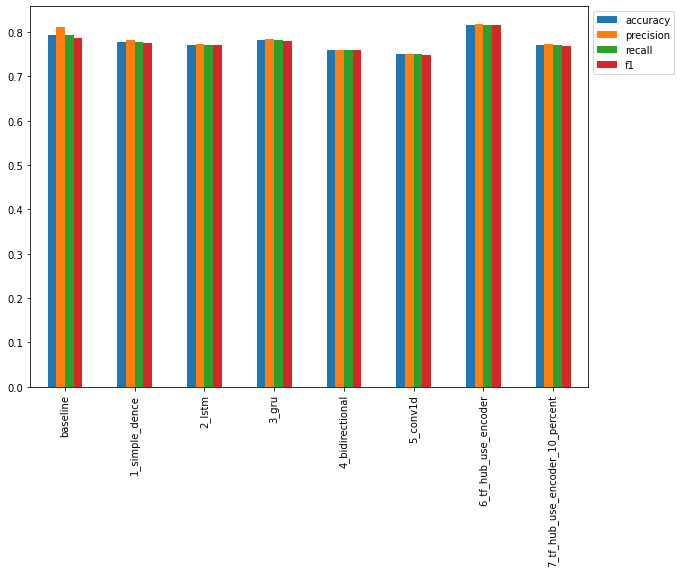

In [113]:
#pot and comapre all the model
all_model_results.plot(kind="bar",figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0))

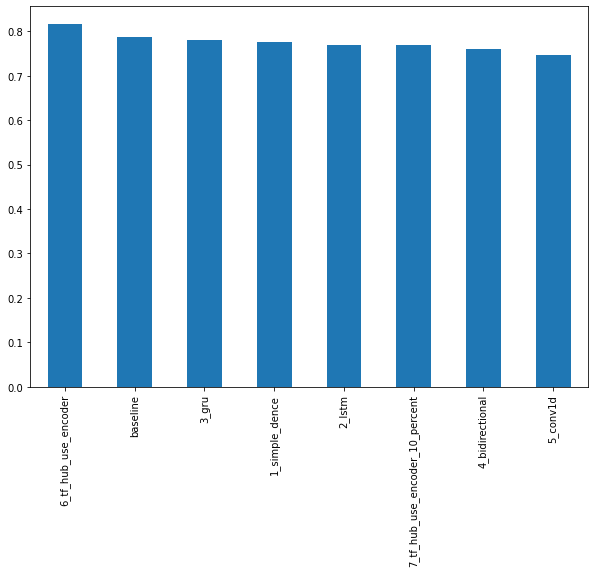

In [114]:
#sort model resutls bu f1-score
all_model_results.sort_values("f1",ascending=False)["f1"].plot(kind="bar",figsize=(10,7))

##Uploading Model Training Logs

View your TensorBoard at https://tensorboard.dev/experiment/QElREKq4TVGbkfG8ye7vrA/


In [116]:
# # #view tensorboard logs of transfer leraning experients/upload dev records
# !tensorboard dev upload --logdir ./model_logs/ \
#   --name "Natural Language Processing with Different Types of Models" \
#   --description "Different experiments with same models using different types of Model Creation Steps" \
#   --one_shot

##Save and Load Model

In [117]:
model_6_results


{'accuracy': 81.62729658792651,
 'f1': 0.8153469807013113,
 'precision': 0.8170007401548035,
 'recall': 0.8162729658792651}

In [118]:
#save the model
model_6.save("model_6.h5")

In [119]:
#load the model
import tensorflow_hub as hub
loaded_model_6=tf.keras.models.load_model("model_6.h5",
                                          custom_objects={"KerasLayer":hub.KerasLayer})

In [120]:
#evaluate loaded model
loaded_model_6.evaluate(val_sentences,val_labels)

24/24 [==============================] - 1s 9ms/step - loss: 0.4254 - accuracy: 0.8163


[0.4254186153411865, 0.8162729740142822]

In [121]:
#save model in save model format
model_6.save("Model_6_save_model_format")

INFO:tensorflow:Assets written to: Model_6_save_model_format/assets


INFO:tensorflow:Assets written to: Model_6_save_model_format/assets


In [122]:
#load in a model from save model
loaded_model_6_save_model_format=tf.keras.models.load_model("Model_6_save_model_format")

In [130]:
#evaluate the model
loaded_model_6_save_model_format.evaluate(val_sentences,val_labels)


24/24 [==============================] - 0s 9ms/step - loss: 0.4254 - accuracy: 0.8163


[0.4254186153411865, 0.8162729740142822]

In [131]:
# #download the model
# from google.colab import files
# files.download("/content/Model_6_save_model_format")

In [132]:
# #download the model
# from google.colab import files
# files.download("/content/model_6.h5")

##Finding the most wrong predictions


In [133]:
#Create dataframe with validation with model predtions
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip

--2021-08-13 03:46:08--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 2607:f8b0:400e:c08::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M   266MB/s    in 3.4s    

2021-08-13 03:46:12 (270 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]



In [134]:
!unzip 08_model_6_USE_feature_extractor.zip

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables.index  
  inflating: 08_model_6_USE_feature_extractor/saved_model.pb  


In [135]:
#import the model
model_6_pretrained=tf.keras.models.load_model("/content/08_model_6_USE_feature_extractor")
model_6_pretrained

In [138]:
model_6_pretrained.evaluate(val_sentences,val_labels)

24/24 [==============================] - 1s 9ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723122239112854, 0.8162729740142822]

In [139]:
#make predictions 
model_6_pretrained_pred_probs =model_6_pretrained.predict(val_sentences)
model_6_pretrained_preds=tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretrained_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [141]:
#craete df with validation dataframes and labels
val_df=pd.DataFrame({"text":val_sentences,
                     "target":val_labels,
                     "pred":model_6_pretrained_preds,
                     "pred_probs":tf.squeeze(model_6_pretrained_pred_probs)})

val_df.head()

,text,target,pred,pred_probs
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [145]:
#find the wrong predction and sort 
most_wrong =val_df[val_df["target"] !=val_df["pred"]].sort_values("pred_probs",ascending=False)
most_wrong[:20]


,text,target,pred,pred_probs
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.814816
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.810840
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.803122
119,@freefromwolves GodsLove &amp; #thankU brother...,0,1.0,0.766901
344,Air Group is here to the rescue! We have 24/7 ...,0,1.0,0.766625


In [151]:
most_wrong.tail(20)

,text,target,pred,pred_probs
535,Rand Paul's Debate Strategy 'demolish Some oth...,1,0.0,0.098877
198,Perspectives on the Grateful Dead: Critical Wr...,1,0.0,0.094571
127,Petition | Heartless owner that whipped horse ...,1,0.0,0.093697
306,@Zak_Bagans this is Sabrina my dad rescued her...,1,0.0,0.092346
192,New post from @darkreading http://t.co/8eIJDXA...,1,0.0,0.082527
486,VICTORINOX SWISS ARMY DATE WOMEN'S RUBBER MOP ...,1,0.0,0.080427
361,Next May I'll be free...from school from oblig...,1,0.0,0.078982
40,@BoyInAHorsemask its a panda trapped in a dogs...,1,0.0,0.071388
352,@reriellechan HE WAS THE LICH KING'S FIRST CAS...,1,0.0,0.071257
681,'The way you move is like a full on rainstorm ...,1,0.0,0.069671


In [152]:
len(most_wrong)

140

In [153]:
#check for the false positives
for row in most_wrong[:10].itertuples():
  _,text,target,pred,pred_prob =row
  print(f"Target :{target} ,Pred :{pred} ,Prob :{pred_prob}")
  print(f"Text :\n{text}\n")
  print("------\n")

Target :0 ,Pred :1.0 ,Prob :0.9101957678794861
Text :
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

------

Target :0 ,Pred :1.0 ,Prob :0.8769821524620056
Text :
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

------

Target :0 ,Pred :1.0 ,Prob :0.8523000478744507
Text :
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

------

Target :0 ,Pred :1.0 ,Prob :0.8354544639587402
Text :
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

------

Target :0 ,Pred :1.0 ,Prob :0.8272132873535156
Text :
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

------

Target :0 ,Pred :1.0 ,Prob :0.814815878868103
Text :
@SonofLiberty357 all illuminated by the brightly burning buildings all around

In [154]:
#check for the false positives
for row in most_wrong[:-10].itertuples():
  _,text,target,pred,pred_prob =row
  print(f"Target :{target} ,Pred :{pred} ,Prob :{pred_prob}")
  print(f"Text :\n{text}\n")
  print("------\n")

Target :0 ,Pred :1.0 ,Prob :0.9101957678794861
Text :
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

------

Target :0 ,Pred :1.0 ,Prob :0.8769821524620056
Text :
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

------

Target :0 ,Pred :1.0 ,Prob :0.8523000478744507
Text :
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

------

Target :0 ,Pred :1.0 ,Prob :0.8354544639587402
Text :
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

------

Target :0 ,Pred :1.0 ,Prob :0.8272132873535156
Text :
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

------

Target :0 ,Pred :1.0 ,Prob :0.814815878868103
Text :
@SonofLiberty357 all illuminated by the brightly burning buildings all around

##Make Predicion on test dataset

In [156]:
#test with the model and visulaize them
test_sentences =test_df["text"].to_list()
test_samples=random.sample(test_sentences,10)
for test_sample in test_samples:
  pred_prob=tf.squeeze(model_6_pretrained.predict([test_sample]))
  pred =tf.round(pred_prob)
  print(f"Pred :{int(pred)},Prob :{pred_prob}")
  print(f"Text :\n{test_sample}\n")
  print("-----------\n")

Pred :0,Prob :0.09896622598171234
Text :
Changelessly handle dominant quarantine folders toward yours solemnity: hjt http://t.co/ccTt1mY7FA

-----------

Pred :0,Prob :0.18956705927848816
Text :
@jonathanshainin I think the bomb raises all sorts of great questions but this isn't one of them

-----------

Pred :0,Prob :0.3052707016468048
Text :
Brass and Copper in Cataclysm &amp; AfterShock!!! http://t.co/uxYZyaygTy

-----------

Pred :1,Prob :0.8925357460975647
Text :
Pickup Truck Fire On Driscoll Bridge Snags Garden State Parkway #NewYork http://t.co/Q5YU2tZGte

-----------

Pred :1,Prob :0.9625121355056763
Text :
Families to sue over Legionnaires: More than 40 families affected by the fatal outbreak of Legionnaires' disea... http://t.co/z16jNX3LQe

-----------

Pred :0,Prob :0.058331266045570374
Text :
@BlackHatWriter Yeah I'm going to be at home by a computer for the next two weekends. :( Getting really burned out really quick.

-----------

Pred :0,Prob :0.1734434962272644
Text :
O

##The Speed/Score Trade off

In [165]:
#fuunction to measure the time
import time
def pred_timer(model,samples):
  """
  Times how long model takes to make predctions on samples
  """

  start_time =time.perf_counter() #get start time
  model.predict(samples)
  end_time =time.perf_counter()
  total_time =end_time-start_time
  time_per_pred =total_time/len(samples)
  return total_time,time_per_pred

In [166]:
#calculate the time
model_6_total_pred_time,model_6_time_per_pred =pred_timer(model=model_6_pretrained,
                                                          samples=val_sentences)
model_6_total_pred_time,model_6_time_per_pred

(0.22177206600099453, 0.00029103945669421856)

In [167]:
#calculte base line model total pred time
baseline_model_total_pred_time,baseline_model_time_per_pred =pred_timer(model=model_0,
                                                          samples=val_sentences)
baseline_model_total_pred_time,baseline_model_time_per_pred

(0.018397293000816717, 2.4143429134930074e-05)

In [168]:
#get results for pre trained model
model_6_pretrained_results=calcualte_results(y_true=val_labels,
                                             y_preds=model_6_pretrained_preds)

model_6_pretrained_results

{'accuracy': 81.62729658792651,
 'f1': 0.8148082644367335,
 'precision': 0.818446310697231,
 'recall': 0.8162729658792651}

Text(0, 0.5, 'F1 -Score')

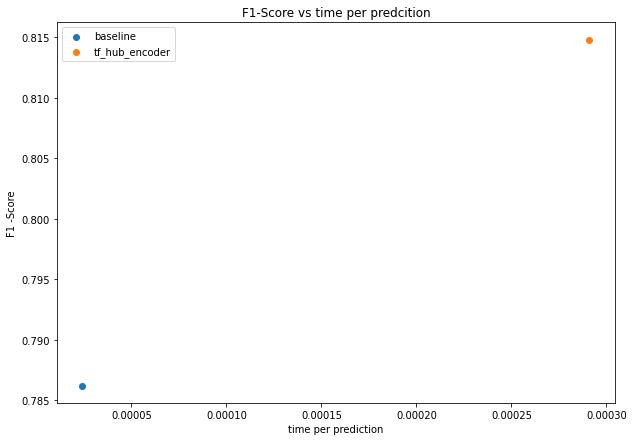

In [169]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(baseline_model_time_per_pred,baseline_results["f1"],label="baseline")
plt.scatter(model_6_time_per_pred,model_6_pretrained_results["f1"],label="tf_hub_encoder")
plt.legend()
plt.title("F1-Score vs time per predcition")
plt.xlabel("time per prediction")
plt.ylabel("F1 -Score")

In [185]:
#trainable layers
for layer in model_6.layers:
  print(layer,layer.trainable)

<tensorflow_hub.keras_layer.KerasLayer object at 0x7fdade6d2d90> False
<tensorflow.python.keras.layers.core.Dense object at 0x7fd96cb218d0> True
<tensorflow.python.keras.layers.core.Dense object at 0x7fd8690ef190> True
